In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from time import gmtime, strftime, localtime
from matplotlib.ticker import MultipleLocator

params = {"xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "Tahoma"
plt.rcParams["font.size"]=10

In [2]:
trend_df = pd.read_csv('trend_mhws_v202504.csv')
trend_df

,Site_ID,Latitude,Longitude,Ecoregion,Habitat,MHWs_per_year,MHWs_linear_trend_per_decade,MHWs_trend_is_significant,Duration_per_year,Duration_linear_trend_per_decade,...,Cum_intensity_trend_is_significant,Intensity_var_per_year,Intensity_var_linear_trend_per_decade,Intensity_var_trend_is_significant,Onset_rate_per_year,Onset_rate_linear_trend_per_decade,Onset_rate_trend_is_significant,Decline_rate_per_year,Decline_rate_linear_trend_per_decade,Decline_rate_trend_is_significant
0,1,-31.472439,-51.142094,Rio Grande,Seagrass meadow,2.536585,0.372822,False,10.726384,1.688238,...,False,0.346894,-0.035656,False,0.399613,-0.184093,True,0.440265,0.008593,False
1,2,-31.472439,-51.133094,Rio Grande,Seagrass meadow,2.463415,0.310105,False,10.890844,1.670880,...,False,0.351044,-0.034122,False,0.406072,-0.170930,True,0.440728,0.006849,False
2,3,-31.472439,-51.124094,Rio Grande,Seagrass meadow,2.439024,0.332753,False,10.923466,1.587707,...,False,0.368958,-0.053202,False,0.427646,-0.172991,True,0.450957,-0.005631,False
3,4,-31.463439,-51.142094,Rio Grande,Seagrass meadow,2.536585,0.378049,False,10.822399,1.653077,...,False,0.354366,-0.035713,False,0.404219,-0.181432,True,0.440792,0.009697,False
4,5,-31.463439,-51.133094,Rio Grande,Seagrass meadow,2.463415,0.360627,False,10.872060,1.610598,...,False,0.373384,-0.047801,False,0.415228,-0.184139,True,0.457225,0.002582,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119222,119223,0.918561,-29.353094,Sao Pedro and Sao Paulo Islands,Mesophotic reef,3.146341,1.719512,True,11.676612,2.941241,...,True,0.170795,0.010550,False,0.196376,-0.036185,False,0.194703,-0.013286,False
119223,119224,0.918561,-29.344094,Sao Pedro and Sao Paulo Islands,Mesophotic reef,3.146341,1.719512,True,11.676612,2.941241,...,True,0.170795,0.010550,False,0.196376,-0.036185,False,0.194703,-0.013286,False
119224,119225,0.918561,-29.335094,Sao Pedro and Sao Paulo Islands,Mesophotic reef,3.146341,1.719512,True,11.676612,2.941241,...,True,0.170795,0.010550,False,0.196376,-0.036185,False,0.194703,-0.013286,False
119225,119226,0.918561,-29.326094,Sao Pedro and Sao Paulo Islands,Mesophotic reef,3.146341,1.719512,True,11.676612,2.941241,...,True,0.170795,0.010550,False,0.196376,-0.036185,False,0.194703,-0.013286,False


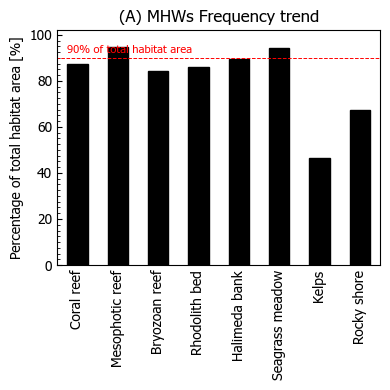

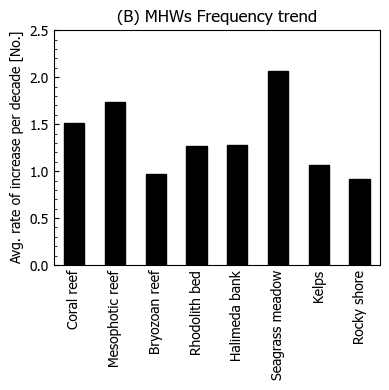

In [3]:
ordered_habitats = ['Coral reef', 'Mesophotic reef', 'Bryozoan reef', 'Rhodolith bed', 'Halimeda bank', 'Seagrass meadow', 'Kelps', 'Rocky shore']

all_habitats = trend_df['Habitat'].unique()
all_habitats.sort()

significant_sites = trend_df[trend_df['MHWs_trend_is_significant']==True]
significant_sites = significant_sites[significant_sites['MHWs_linear_trend_per_decade'] >= 0]
habitat_impact_count = significant_sites['Habitat'].value_counts()
total_habitat_count = trend_df['Habitat'].value_counts()

percentage_impacted = (habitat_impact_count / total_habitat_count * 100).fillna(0).reindex(ordered_habitats, fill_value=0)

plt.figure(figsize=(4, 4))
ax = percentage_impacted.plot(kind='bar', color='black', edgecolor='black')
plt.xlabel('')
plt.ylabel('Percentage of total habitat area [%]')
plt.title('(A) MHWs Frequency trend')
plt.ylim(0, 102)
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(axis='x', rotation=90)
plt.hlines(90, -2, 10, color='red', ls='--', lw=.7)
plt.text(-.25, 92, '90% of total habitat area', fontsize=8, color='red')
plt.tight_layout()
#plt.savefig('new_figures/trends/nmhws_percentage_trend_area.png', dpi=200)
plt.show()

average_increase = significant_sites.groupby('Habitat')['MHWs_linear_trend_per_decade'].mean().reindex(ordered_habitats, fill_value=0)
plt.figure(figsize=(4, 4))
ax = average_increase.plot(kind='bar', color='black', edgecolor='black')
plt.xlabel('')
plt.ylim(0, 2.5)
plt.ylabel('Avg. rate of increase per decade [No.]')
plt.title('(B) MHWs Frequency trend')
ax.yaxis.set_minor_locator(MultipleLocator(.1))
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
#plt.savefig('new_figures/trends/nmhws_average_trend_decade.png', dpi=200)
plt.show()
